In [ ]:
import pandas as pd
from scipy.io import arff
data = pd.read_csv('/content/bank_note.csv')
df=pd.DataFrame(data)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,id,V1,V2,V3,V4,Class
0,1,3.62160,8.6661,-2.8073,-0.44699,1
1,2,4.54590,8.1674,-2.4586,-1.46210,1
2,3,3.86600,-2.6383,1.9242,0.10645,1
3,4,3.45660,9.5228,-4.0112,-3.59440,1
4,5,0.32924,-4.4552,4.5718,-0.98880,1


In [ ]:
df.shape

(1372, 7)

In [ ]:
df.describe()

,id,V1,V2,V3,V4,Class,KMeans
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,686.500000,0.433735,1.922353,1.397627,-1.191657,1.444606,1.436589
std,396.206596,2.842763,5.869047,4.310030,2.101013,0.497103,0.496144
min,1.000000,-7.042100,-13.773100,-5.286100,-8.548200,1.000000,1.000000
25%,343.750000,-1.773000,-1.708200,-1.574975,-2.413450,1.000000,1.000000
50%,686.500000,0.496180,2.319650,0.616630,-0.586650,1.000000,1.000000
75%,1029.250000,2.821475,6.814625,3.179250,0.394810,2.000000,2.000000
max,1372.000000,6.824800,12.951600,17.927400,2.449500,2.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1372 non-null   int64  
 1   V1      1372 non-null   float64
 2   V2      1372 non-null   float64
 3   V3      1372 non-null   float64
 4   V4      1372 non-null   float64
 5   Class   1372 non-null   int64  
 6   KMeans  1372 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 75.2 KB


In [ ]:
df[df.duplicated()].shape[0]

0

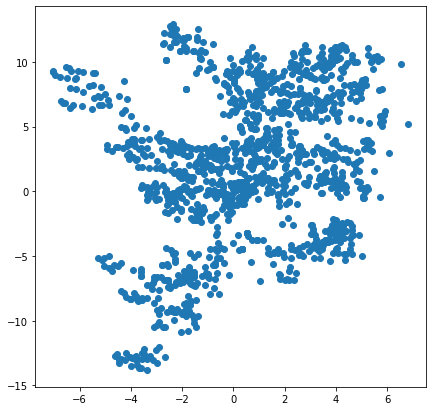

In [ ]:
plt.figure(figsize = [7, 7])
plt.scatter(df.V1, df.V2);

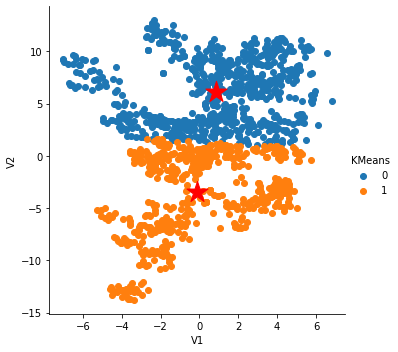

In [ ]:
data = np.column_stack(( df.V1, df.V2))  # we use only V1 and V2

# compute K-Means
km_res = KMeans(n_clusters = 2).fit(data)
clusters = km_res.cluster_centers_

# put the assigned labels to the original dataset
df['KMeans'] = km_res.labels_

#plot out the result
g = sb.FacetGrid(data = df, hue = 'KMeans', size = 5)
g.map(plt.scatter, 'V3', 'V4')
g.add_legend();
plt.scatter(clusters[:,0], clusters[:,1], s=500, marker='*', c='r')

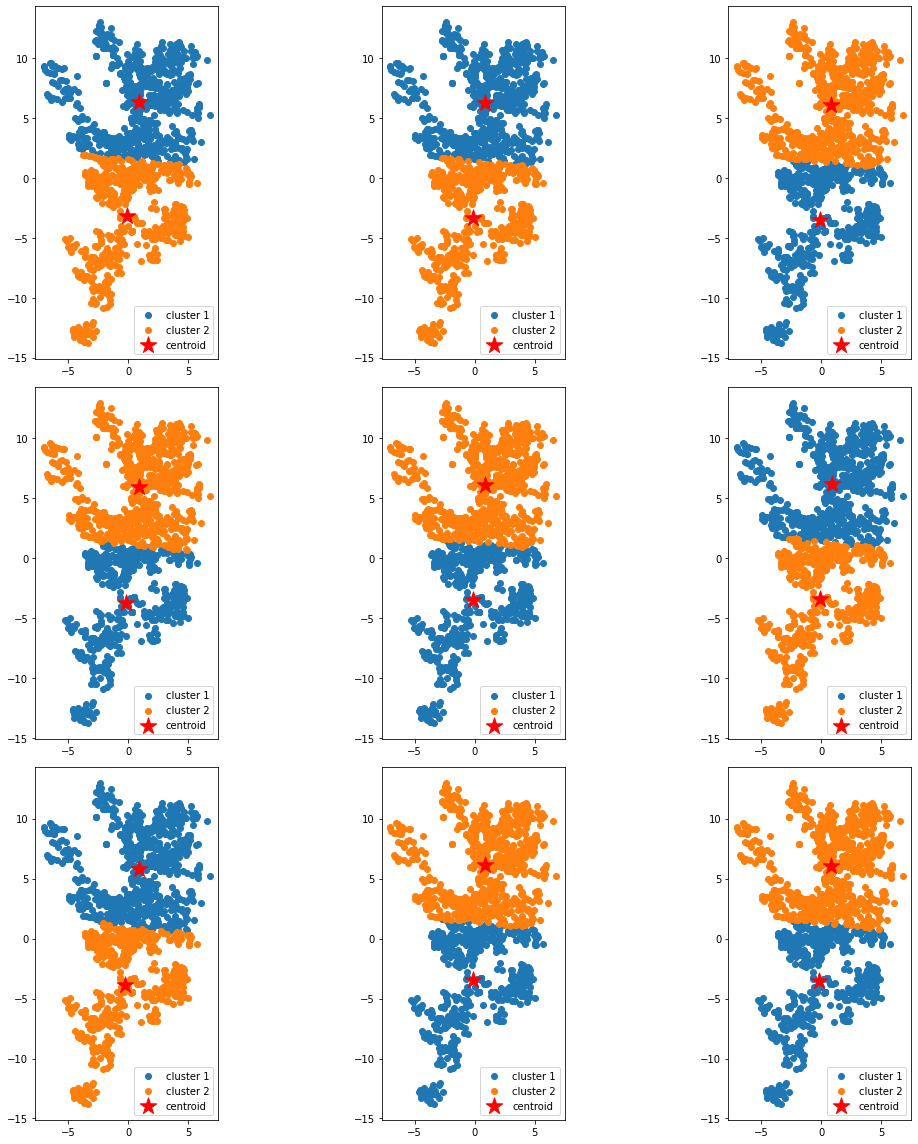

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import  make_moons
from sklearn.cluster import KMeans, SpectralClustering

n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=2,
                max_iter=3)
    km.fit(data)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(data[km.labels_ == 0, 0], data[km.labels_ == 0, 1],
                   label='cluster 1')
    ax[i].scatter(data[km.labels_ == 1, 0], data[km.labels_ == 1, 1],
                   label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].legend(loc='lower right')
    ax[i].set_aspect('equal')
plt.tight_layout();

In [ ]:
km_res.cluster_centers_

array([[ 0.86960048,  6.12717909],
       [-0.12376677, -3.45591265]])

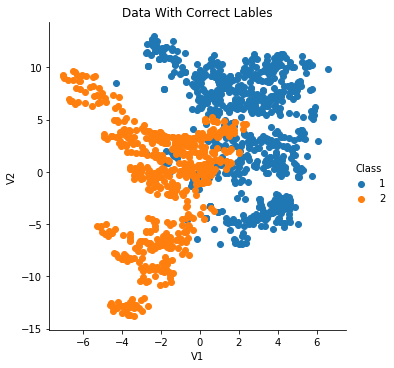

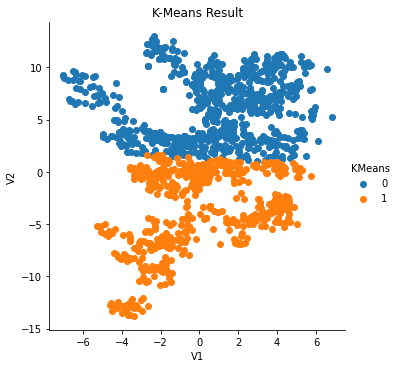

In [ ]:
g = sb.FacetGrid(data = df, hue = 'Class', size = 5)
g.map(plt.scatter, 'V3', 'V4')
g.add_legend()
plt.title("Data With Correct Lables")


# plot the data computed by K-Means
g = sb.FacetGrid(data = df, hue = 'KMeans', size = 5)
g.map(plt.scatter, 'V3', 'V4')
g.add_legend()
plt.title("K-Means Result");

In [ ]:
df['KMeans'] = km_res.labels_
df.groupby('KMeans').describe()

id                                                             \
        count        mean         std  min    25%    50%     75%     max   
KMeans                                                                     
0       773.0  595.882277  382.922019  1.0  280.0  542.0   892.0  1368.0   
1       599.0  803.440735  382.480842  3.0  530.0  876.0  1121.5  1372.0   

           V1                                                                \
        count      mean       std     min      25%      50%     75%     max   
KMeans                                                                        
0       773.0  0.867409  2.908508 -7.0421 -0.95403  1.11660  3.1896  6.8248   
1       599.0 -0.125914  2.655152 -5.2943 -2.18825 -0.65767  2.0159  5.7403   

           V2                                                          \
        count      mean       std      min      25%     50%       75%   
KMeans                                                                  
0       773.0  6.108644  3.096698   1.0367  3.25700  6.1437  8.794400   
1       599.0 -3.479989  3.834604 -13.7731 -6.30615 -2.9363 -0.066226   

                    V3                                                         \
            max  count      mean       std     min      25%      50%      75%   
KMeans                                                                          
0       12.9516  773.0 -1.020715  2.361730 -5.2861 -3.01120 -0.96252  0.57551   
1        1.6327  599.0  4.518459  4.251174 -2.6411  1.35225  3.68840  7.43920   

                    V4                                                         \
            max  count      mean       std     min      25%      50%      75%   
KMeans                                                                          
0        7.7618  773.0 -2.133551  2.238323 -8.5482 -3.86080 -1.72070 -0.38751   
1       17.9274  599.0  0.023844  1.012786 -3.3202 -0.54462  0.10645  0.75041   

                Class                                               
           max  count      mean       std  min  25%  50%  75%  max  
KMeans                                                              
0       2.1547  773.0  1.315653  0.465076  1.0  1.0  1.0  2.0  2.0  
1       2.4495  599.0  1.611018  0.487927  1.0  1.0  2.0  2.0  2.0

In [ ]:
df["KMeans"] = df["KMeans"].map({0: 1, 1: 2})

In [ ]:
correct = 0
print()
print()
# print(df["KMeans"])
for i in range(0,1372):
    if df.Class[i] == df["KMeans"][i]:
       correct+=1
print(correct/1371)



0.6528081692195478
